In [1]:
# Uncomment to use with Colab.
# !git clone https://github.com/fbickfordsmith/aims-data-estimation-inference.git
# !cd aims-data-estimation-inference/

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('.')

In [4]:
import gpflow
import matplotlib.pyplot as plt
import numpy as np
from gp.data import load_data
from gp.kernels import exponentiated_quadratic, periodic, periodic_exp_quad
from gp.modelling import (
    log_likelihood, optimise, optimise_predict_sequential, predict)
from gp.plotting import (
    plot_regression_problem, plot_effects_mean_kernel, plot_posterior,
    plot_samples)

## Taking a quick look at the data

In [5]:
x_train, x_test, x_plot, y_train, y_test, y_mean = load_data(normalise=True)
load_data(mode='dataframe')

,Update Date and Time (ISO),Update Duration (ms),Reading Date and Time (ISO),Air pressure (mb),Air temperature (C),Tide height (m),Wind direction (deg),Wind gust speed (kn),Wind speed (kn),True air temperature (C),True tide height (m),Independent tide height prediction (m),Independent tide height deviation (m),Dependent tide height prediction (m),Dependent tide height deviation (m),Independent air temperature prediction (C),Independent air temperature deviation (C),Dependent air temperature prediction (C),Dependent air temperature deviation (C)
0,2007-05-26T12:05:00,0,2007-05-26T12:05:00,NaN,NaN,NaN,NaN,NaN,NaN,16.92,2.30,2.4007,0.039110,2.3715,0.036670,17.2348,0.23222,17.2339,0.23187
1,2007-05-26T12:10:00,0,2007-05-26T12:10:00,1006.0,16.7,2.3,22.0,12.0,12.4,16.42,2.24,2.4016,0.058707,2.3365,0.045564,17.1932,0.29931,17.1848,0.29732
2,2007-05-26T12:15:00,0,2007-05-26T12:15:00,1006.0,16.0,2.2,13.0,18.1,13.2,16.00,2.19,2.2945,0.037006,2.2836,0.029853,16.8005,0.25186,16.8130,0.24920
3,2007-05-26T12:20:00,0,2007-05-26T12:20:00,1006.0,15.9,2.1,16.0,14.2,13.0,15.92,2.14,2.1455,0.021627,2.1553,0.019945,16.0734,0.17207,16.0621,0.17101
4,2007-05-26T12:25:00,0,2007-05-26T12:25:00,1005.0,16.1,2.1,12.0,14.4,12.0,16.08,2.09,2.0900,0.028609,2.1115,0.023468,15.8401,0.21507,15.8126,0.21158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2007-05-31T15:55:00,0,2007-05-31T15:55:00,NaN,NaN,NaN,NaN,NaN,NaN,16.00,2.19,2.1759,0.020713,2.2065,0.018579,16.1252,0.15125,16.1222,0.14964
1254,2007-05-31T16:00:00,0,2007-05-31T16:00:00,1007.0,15.9,2.1,123.0,22.3,20.4,15.92,2.08,2.0803,0.019198,2.0998,0.017608,16.0285,0.14422,16.0271,0.14289
1255,2007-05-31T16:05:00,0,2007-05-31T16:05:00,1007.0,15.6,2.0,119.0,21.6,19.8,15.67,1.98,1.9782,0.023006,1.9904,0.020269,15.9775,0.16485,15.9777,0.16287
1256,2007-05-31T16:10:00,0,2007-05-31T16:10:00,NaN,NaN,NaN,NaN,NaN,NaN,15.50,1.90,1.8911,0.021864,1.8955,0.019338,15.8007,0.15911,15.8028,0.15730


## Posing the regression problem

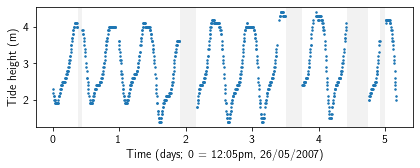

In [6]:
fig, ax = plot_regression_problem()
# fig.savefig('figures/regression_problem.pdf')

## Showing the effects of the mean and covariance functions

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


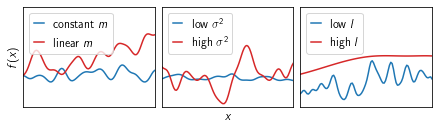

In [7]:
fig, ax = plot_effects_mean_kernel(exponentiated_quadratic)
# fig.savefig('figures/effects_mean_kernel.pdf')

## Exploring covariance functions for our regression problem

-------------------------------------------------------
exponentiated_quadratic
-------------------------------------------------------
params, log marginal likelihood
[0.794 0.075] 40
[0.794 0.075] 40
[0.794 0.075] 40
[0.794 0.075] 40
[0.616 0.   ] -1146
-------------------------------------------------------
log likelihood: -24


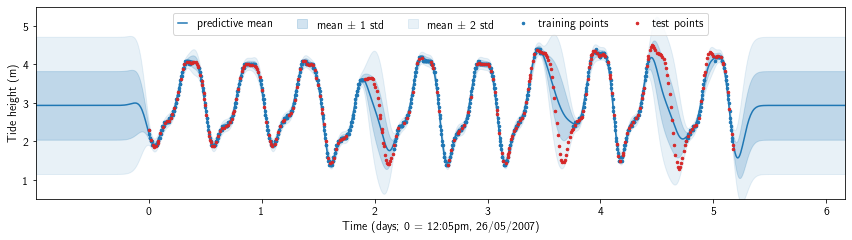

In [8]:
kernel, num_params, num_starts = exponentiated_quadratic, 2, 5
_, params = optimise(x_train, y_train, kernel, num_params, num_starts)
mean_test, cov_test = predict(x_train, x_test, y_train, kernel, params)
print('log likelihood:', int(log_likelihood(mean_test, cov_test, y_test)))
mean_plot, cov_plot = predict(x_train, x_plot, y_train, kernel, params)
fig, ax = plot_posterior(mean_plot + y_mean, cov_plot)
# fig.savefig('figures/posterior_eq.pdf')

-------------------------------------------------------
periodic
-------------------------------------------------------
params, log marginal likelihood
[0.908 0.499 1.029] 58
[0.838 0.321 1.545] 29
[0.158 0.291 1.279] -2586
[0.89  0.498 1.029] 58
[0.908 0.499 1.029] 58
-------------------------------------------------------
log likelihood: 12


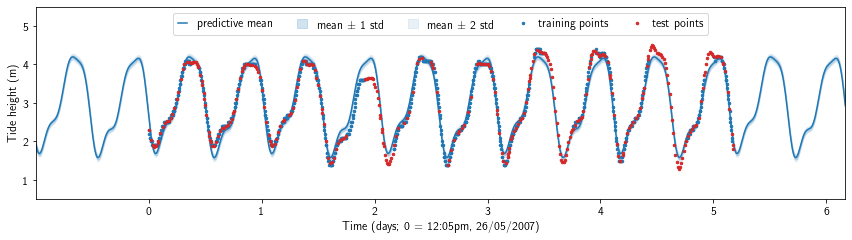

In [9]:
kernel, num_params, num_starts = periodic, 3, 5
_, params = optimise(x_train, y_train, kernel, num_params, num_starts)
mean_test, cov_test = predict(x_train, x_test, y_train, kernel, params)
print('log likelihood:', int(log_likelihood(mean_test, cov_test, y_test)))
mean_plot, cov_plot = predict(x_train, x_plot, y_train, kernel, params)
fig, ax = plot_posterior(mean_plot + y_mean, cov_plot)
# fig.savefig('figures/posterior_per.pdf')

-------------------------------------------------------
periodic_exp_quad
-------------------------------------------------------
params, log marginal likelihood
[0.914 0.488 1.031 0.026 0.141] 111
[0.841 0.314 1.546 0.034 0.15 ] 96
[0.279 5.819 0.    0.625 0.   ] -1150
[0.583 1.346 0.    0.758 0.   ] -1160
[0.    0.    0.    0.794 0.075] 40
-------------------------------------------------------
log likelihood: 52


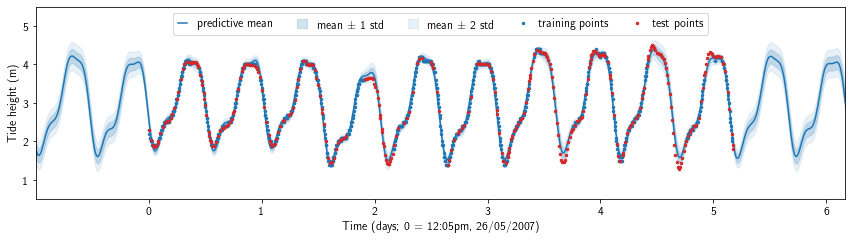

In [10]:
kernel, num_params, num_starts = periodic_exp_quad, 5, 5
_, params = optimise(x_train, y_train, kernel, num_params, num_starts)
mean_test, cov_test = predict(x_train, x_test, y_train, kernel, params)
print('log likelihood:', int(log_likelihood(mean_test, cov_test, y_test)))
mean_plot, cov_plot = predict(x_train, x_plot, y_train, kernel, params)
fig, ax = plot_posterior(mean_plot + y_mean, cov_plot)
# fig.savefig('figures/posterior_per_eq.pdf')

## Using GPflow to validate our implementation

In [11]:
kernel = gpflow.kernels.Periodic(gpflow.kernels.SquaredExponential())
kernel += gpflow.kernels.SquaredExponential()
model = gpflow.models.GPR(data=(x_train, y_train), kernel=kernel)
model.likelihood.variance.assign(0.1)
gpflow.utilities.set_trainable(model.likelihood.variance, False)
model

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].base_kernel.variance,Parameter,Softplus,,True,(),float64,1
GPR.kernel.kernels[0].base_kernel.lengthscales,Parameter,Softplus,,True,(),float64,1
GPR.kernel.kernels[0].period,Parameter,Softplus,,True,(),float64,1
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,1
GPR.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,1
GPR.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.1


In [12]:
optimizer = gpflow.optimizers.Scipy()
optimizer.minimize(
    model.training_loss,
    model.trainable_variables,
    options=dict(maxiter=100))

      fun: -102.58932976840697
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.64743350e-04,  4.58961467e-05,  5.92416503e-03,  2.56667728e-06,
        2.61150826e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 62
   status: 0
  success: True
        x: array([-1.27459608,  0.38876789,  0.58826084, -0.76645574, -3.97359873])

In [13]:
model

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].base_kernel.variance,Parameter,Softplus,,True,(),float64,0.906306
GPR.kernel.kernels[0].base_kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.246504
GPR.kernel.kernels[0].period,Parameter,Softplus,,True,(),float64,1.02992
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.018631
GPR.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,0.381621
GPR.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.1


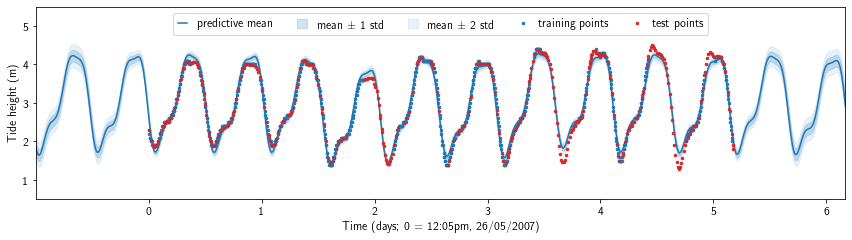

In [14]:
mean, cov = model.predict_f(x_plot, full_cov=True)
mean = mean.numpy() + y_mean
cov = cov.numpy()[0]
fig, ax = plot_posterior(mean, cov)
# fig.savefig('figures/posterior_per_eq_gpflow.pdf')

## Sampling functions from our best model 

In [15]:
kernel, num_params, num_starts  = periodic_exp_quad, 5, 5

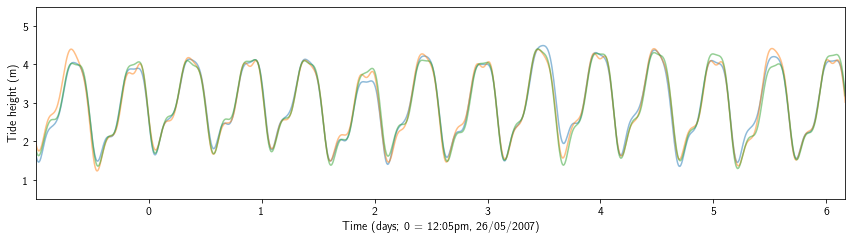

In [16]:
mean_plot, cov_plot = predict(x_train, x_plot, y_train, kernel, params)
fig, ax = plot_samples(mean_plot + y_mean, cov_plot, 3)
# fig.savefig('figures/samples_per_eq.pdf')

## Performing sequential prediction

-------------------------------------------------------
periodic_exp_quad
-------------------------------------------------------
params, log marginal likelihood
[0.812 1.248 0.551 0.    1.201] 5
[0.812 1.248 0.551 0.    4.975] 5
[0.511 0.645 0.894 0.    2.207] 4
[0.511 0.645 0.894 0.    1.791] 4
[0.812 1.248 0.551 0.    5.622] 5
-------------------------------------------------------


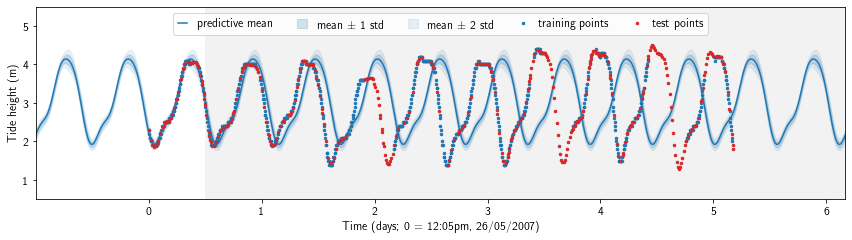

In [17]:
time = 0.5
mean, cov = optimise_predict_sequential(time, x_train, x_plot, y_train, kernel, num_params, num_starts)
fig, ax = plot_posterior(mean + y_mean, cov, time)
# fig.savefig('figures/sequential_t0.pdf')

-------------------------------------------------------
periodic_exp_quad
-------------------------------------------------------
params, log marginal likelihood
[0.616 0.499 1.08  0.    1.725] 11
[0.616 0.499 1.08  0.    1.581] 11
[0.    6.187 0.    0.537 0.08 ] 11
[0.616 0.499 1.08  0.    1.33 ] 11
[0.616 0.499 1.08  0.    0.863] 11
-------------------------------------------------------


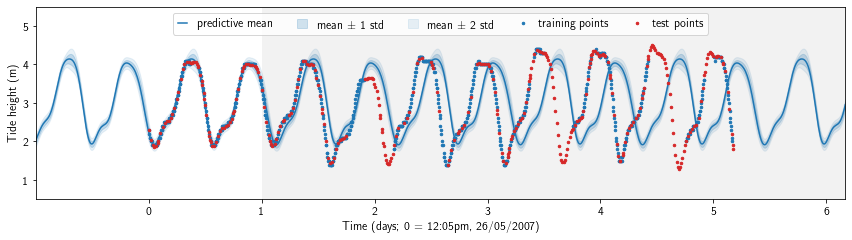

In [18]:
time = 1
mean, cov = optimise_predict_sequential(time, x_train, x_plot, y_train, kernel, num_params, num_starts)
fig, ax = plot_posterior(mean + y_mean, cov, time)
# fig.savefig('figures/sequential_t1.pdf')

-------------------------------------------------------
periodic_exp_quad
-------------------------------------------------------
params, log marginal likelihood
[0.695 0.492 1.04  0.024 0.402] 44
[0.0000e+00 8.7533e+01 0.0000e+00 6.2100e-01 7.7000e-02] 25
[0.7   0.487 1.044 0.    0.   ] 23
[6.00000e-03 1.69802e+02 9.10000e-02 5.13000e-01 0.00000e+00] -478
[6.2100e-01 1.7000e-02 2.7847e+01 0.0000e+00 4.8989e+01] 25
-------------------------------------------------------


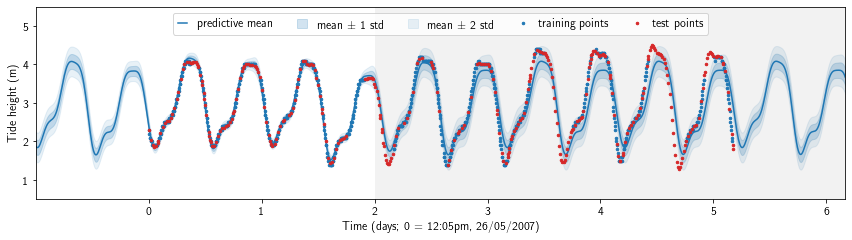

In [19]:
time = 2
mean, cov = optimise_predict_sequential(time, x_train, x_plot, y_train, kernel, num_params, num_starts)
fig, ax = plot_posterior(mean + y_mean, cov, time)
# fig.savefig('figures/sequential_t2.pdf')

-------------------------------------------------------
periodic_exp_quad
-------------------------------------------------------
params, log marginal likelihood
[0.85  0.487 1.032 0.031 0.441] 82
[0.85  0.487 1.032 0.031 0.441] 82
[0.01  7.385 0.    3.184 0.109] 9
[0.    1.096 0.244 0.739 0.076] 39
[ 0.    12.492  0.118  0.616  0.   ] -936
-------------------------------------------------------


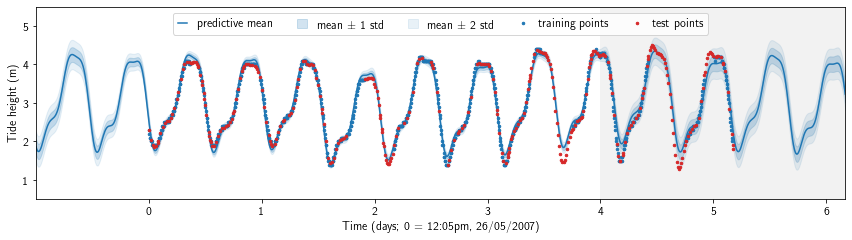

In [20]:
time = 4
mean, cov = optimise_predict_sequential(time, x_train, x_plot, y_train, kernel, num_params, num_starts)
fig, ax = plot_posterior(mean + y_mean, cov, time)
# fig.savefig('figures/sequential_t4.pdf')